In [1]:
using Pkg
Pkg.activate(@__DIR__)

using Plots
Pkg.add("Measures")
using Measures
Pkg.add("Symbolics")
using Symbolics

  Activating project at `~/Desktop/Programming/Week 8`
[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
┌ Warning: backend `GR` is not installed.
└ @ Plots ~/.julia/packages/Plots/HyyIK/src/backends.jl:43
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
   Resolving package versions...
  No Changes to `~/Desktop/Programming/Week 8/Project.toml`
  No Changes to `~/Desktop/Programming/Week 8/Manifest.toml`
Precompiling project...
  ✗ PyCall
  ✗ SciMLBase → SciMLBasePyCallExt
┌ Warning: attempting to remove probably stale pidfile
│   path = "/Users/alexandrcarr/.julia/compiled/v1.10/Symbolics/eABRO_PWyn0.ji.pidfile"
└ @ FileWatching.Pidfile ~/.julia/juliaup/julia-1.10.2+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:244
  ✗ SymPy
  ✓ Symbolics
  ✗ Symbolics → SymbolicsSymPyExt
  ✓ Symbolics → SymbolicsPreallocationToolsExt
  2 dependencies successfully precompiled in 20 seconds. 131 already precompiled.
  4 dependencies 

## Moderate Region Simulation

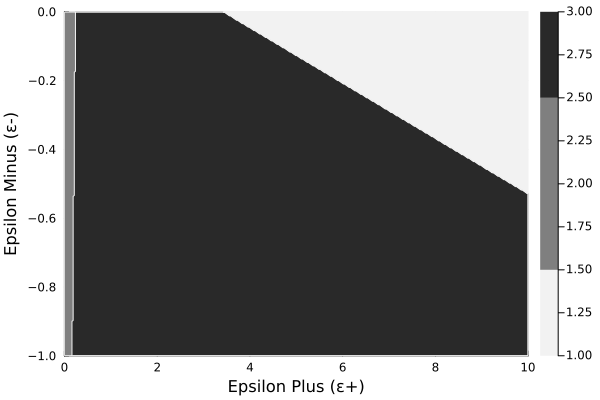

In [2]:
using Plots

# Define the function to calculate the equilibrium prices and determine the case
function calculate_case(w, u, epsilon_plus, epsilon_minus, pi)
    epsilon_expected = pi * epsilon_plus + (1 - pi) * epsilon_minus
    boundary_case1 = (4 - w*epsilon_plus*pi - u*w) / (4 + w*(1-pi))
    boundary_case2 = (4 + w*epsilon_minus - u*w - pi*w*epsilon_minus) / (2*w + 4 - w*pi)
    
    if epsilon_minus >= boundary_case1
        return 1
    elseif epsilon_plus < boundary_case2
        return 2
    else
        return 3
    end
end

pi_val = 0.5
w_val = 0.7
u_val = 4

# Create ranges for epsilon_plus and epsilon_minus
epsilon_plus_range = range(0, stop=10, length=400)
epsilon_minus_range = range(-1, stop=0, length=400)

# Prepare a matrix to store case values
case_matrix = Array{Float64}(undef, length(epsilon_minus_range), length(epsilon_plus_range))

# Populate the case matrix based on the calculated case
for (i, epsilon_plus_val) in enumerate(epsilon_plus_range)
    for (j, epsilon_minus_val) in enumerate(epsilon_minus_range)
        case_matrix[j, i] = calculate_case(w_val, u_val, epsilon_plus_val, epsilon_minus_val, pi_val)
    end
end

# Plotting the contour plot with discrete levels
contour(
    epsilon_plus_range, 
    epsilon_minus_range, 
    case_matrix,
    fill = true,  # Fill between lines for clarity
    color = cgrad([:gray95, :gray50, :gray16]),  # Use a discrete color gradient
    levels = [0.5, 1.5, 2.5, 3.5],  # Define discrete levels for cases 1, 2, 3
    clims = (1, 3),  # Set limits for color mapping
    xlabel = "Epsilon Plus (ε+)",
    ylabel = "Epsilon Minus (ε-)",
    title = ""
)

In [3]:
using Symbolics

# Define the function to calculate the boundary conditions
function calculate_boundaries(w, u, pi)
    @variables epsilon_plus epsilon_minus
    boundary_case1 = (4 - w*epsilon_plus*pi - u*w) / (4 + w*(1-pi))
    boundary_case2 = (4 + w*epsilon_minus - u*w - pi*w*epsilon_minus) / (2*w + 4 - w*pi)
    return boundary_case1, boundary_case2
end

# Set the parameter values
pi_val = 0.5
w_val = 0.7
u_val = 4

# Calculate the boundary conditions
boundary_case1_expr, boundary_case2_expr = calculate_boundaries(w_val, u_val, pi_val)

# Print the expressions for the boundary conditions
println("Boundary Case 1 (Eq. 4.15): epsilon_minus = $boundary_case1_expr")
println("Boundary Case 2 (Eq. 4.16): epsilon_minus = $boundary_case2_expr")

Boundary Case 1 (Eq. 4.15): epsilon_minus = 0.2298850574712644(1.2000000000000002 - 0.35epsilon_plus)
Boundary Case 2 (Eq. 4.16): epsilon_minus = 0.198019801980198(1.2000000000000002 + 0.35epsilon_minus)


## Racist region Simulation

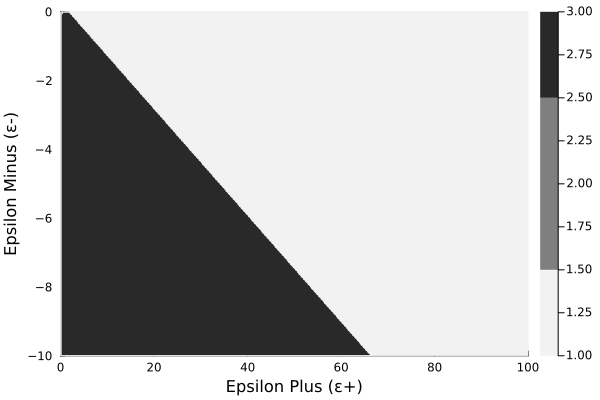

In [14]:
using Plots

# Define the function to calculate the equilibrium prices and determine the case
function calculate_case(w, u, epsilon_plus, epsilon_minus, pi)
    epsilon_expected = pi * epsilon_plus + (1 - pi) * epsilon_minus
    boundary_case1 = (4 - w*epsilon_plus*pi - u*w) / (4 + w*(1-pi))
    boundary_case2 = (4 + w*epsilon_minus - u*w - pi*w*epsilon_minus) / (2*w + 4 - w*pi)
    
    if epsilon_minus >= boundary_case1
        return 1
    elseif epsilon_plus < boundary_case2
        return 2
    else
        return 3
    end
end

pi_val = 0.9
w_val = 0.7
u_val = 4

# Create ranges for epsilon_plus and epsilon_minus
epsilon_plus_range = range(0, stop=100, length=400)
epsilon_minus_range = range(-10, stop=0, length=400)

# Prepare a matrix to store case values
case_matrix = Array{Float64}(undef, length(epsilon_minus_range), length(epsilon_plus_range))

# Populate the case matrix based on the calculated case
for (i, epsilon_plus_val) in enumerate(epsilon_plus_range)
    for (j, epsilon_minus_val) in enumerate(epsilon_minus_range)
        case_matrix[j, i] = calculate_case(w_val, u_val, epsilon_plus_val, epsilon_minus_val, pi_val)
    end
end

# Plotting the contour plot with discrete levels
contour(
    epsilon_plus_range, 
    epsilon_minus_range, 
    case_matrix,
    fill = true,  # Fill between lines for clarity
    color = cgrad([:gray95, :gray50, :gray16]),  # Use a discrete color gradient
    levels = [0.5, 1.5, 2.5, 3.5],  # Define discrete levels for cases 1, 2, 3
    clims = (1, 3),  # Set limits for color mapping
    xlabel = "Epsilon Plus (ε+)",
    ylabel = "Epsilon Minus (ε-)",
    title = ""
)

In [19]:
using Symbolics

# Define the function to calculate the boundary conditions
function calculate_boundaries(w, u, pi)
    @variables epsilon_plus epsilon_minus
    boundary_case1 = (4 - w*epsilon_plus*pi - u*w) / (4 + w*(1-pi))
    boundary_case2 = (4 + w*epsilon_minus - u*w - pi*w*epsilon_minus) / (2*w + 4 - w*pi)
    return boundary_case1, boundary_case2
end

# Set the parameter values
pi_val = 0.9
w_val = 0.7
u_val = 4

# Calculate the boundary conditions
boundary_case1_expr, boundary_case2_expr = calculate_boundaries(w_val, u_val, pi_val)

# Print the expressions for the boundary conditions
println("Boundary Case 1 (Eq. 4.15): epsilon_minus = $boundary_case1_expr")
println("Boundary Case 2 (Eq. 4.16): epsilon_minus = $boundary_case2_expr")

Boundary Case 1 (Eq. 4.15): epsilon_minus = 0.24570024570024568(1.2000000000000002 - 0.63epsilon_plus)
Boundary Case 2 (Eq. 4.16): epsilon_minus = 0.20964360587002095(1.2000000000000002 + 0.06999999999999995epsilon_minus)


## Pro-Roma region Simulation

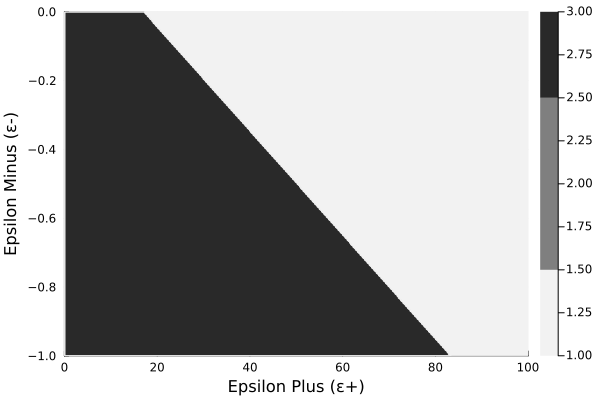

In [18]:
using Plots

# Define the function to calculate the equilibrium prices and determine the case
function calculate_case(w, u, epsilon_plus, epsilon_minus, pi)
    epsilon_expected = pi * epsilon_plus + (1 - pi) * epsilon_minus
    boundary_case1 = (4 - w*epsilon_plus*pi - u*w) / (4 + w*(1-pi))
    boundary_case2 = (4 + w*epsilon_minus - u*w - pi*w*epsilon_minus) / (2*w + 4 - w*pi)
    
    if epsilon_minus >= boundary_case1
        return 1
    elseif epsilon_plus < boundary_case2
        return 2
    else
        return 3
    end
end

pi_val = 0.1
w_val = 0.7
u_val = 4

# Create ranges for epsilon_plus and epsilon_minus
epsilon_plus_range = range(0, stop=100, length=400)
epsilon_minus_range = range(-1, stop=0, length=400)

# Prepare a matrix to store case values
case_matrix = Array{Float64}(undef, length(epsilon_minus_range), length(epsilon_plus_range))

# Populate the case matrix based on the calculated case
for (i, epsilon_plus_val) in enumerate(epsilon_plus_range)
    for (j, epsilon_minus_val) in enumerate(epsilon_minus_range)
        case_matrix[j, i] = calculate_case(w_val, u_val, epsilon_plus_val, epsilon_minus_val, pi_val)
    end
end

# Plotting the contour plot with discrete levels
contour(
    epsilon_plus_range, 
    epsilon_minus_range, 
    case_matrix,
    fill = true,  # Fill between lines for clarity
    color = cgrad([:gray95, :gray50, :gray16]),  # Use a discrete color gradient
    levels = [0.5, 1.5, 2.5, 3.5],  # Define discrete levels for cases 1, 2, 3
    clims = (1, 3),  # Set limits for color mapping
    xlabel = "Epsilon Plus (ε+)",
    ylabel = "Epsilon Minus (ε-)",
    title = ""
)

In [16]:
using Symbolics

# Define the function to calculate the boundary conditions
function calculate_boundaries(w, u, pi)
    @variables epsilon_plus epsilon_minus
    boundary_case1 = (4 - w*epsilon_plus*pi - u*w) / (4 + w*(1-pi))
    boundary_case2 = (4 + w*epsilon_minus - u*w - pi*w*epsilon_minus) / (2*w + 4 - w*pi)
    return boundary_case1, boundary_case2
end

# Set the parameter values
pi_val = 0.1
w_val = 0.7
u_val = 4

# Calculate the boundary conditions
boundary_case1_expr, boundary_case2_expr = calculate_boundaries(w_val, u_val, pi_val)

# Print the expressions for the boundary conditions
println("Boundary Case 1 (Eq. 4.15): epsilon_minus = $boundary_case1_expr")
println("Boundary Case 2 (Eq. 4.16): epsilon_minus = $boundary_case2_expr")

Boundary Case 1 (Eq. 4.15): epsilon_minus = 0.2159827213822894(1.2000000000000002 - 0.06999999999999999epsilon_plus)
Boundary Case 2 (Eq. 4.16): epsilon_minus = 0.18761726078799248(1.2000000000000002 + 0.63epsilon_minus)
